In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tqdm import tqdm
import math

In [ ]:
data_imgs = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/CASOS_CHC_FULL/146/C/'

In [ ]:
img_1 = Image.open(data_imgs+'imagem17.jpeg')
img_2 = Image.open(data_imgs+'imagem18.jpeg')
img_3 = Image.open(data_imgs+'imagem19.jpeg')

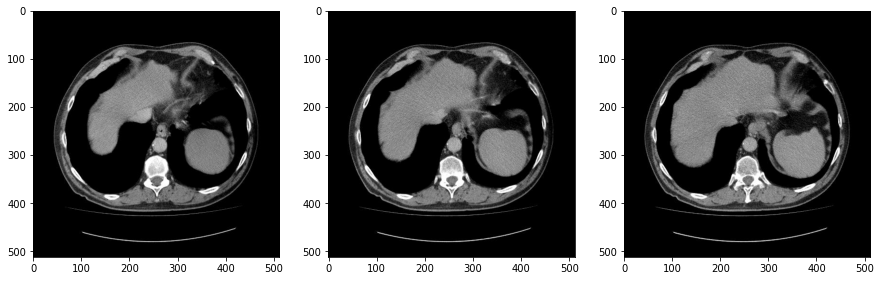

In [ ]:
f, axarr = plt.subplots(1,3, figsize=(15,15))

axarr[0].imshow(img_1, cmap='gray')
axarr[1].imshow(img_2, cmap='gray')
axarr[2].imshow(img_3, cmap='gray')


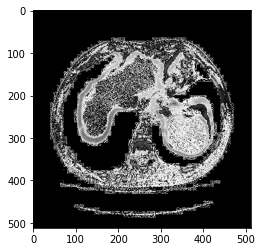

In [ ]:
img_1_2 = np.array(img_1) - np.array(img_2)
plt.imshow(img_1_2, cmap='gray')

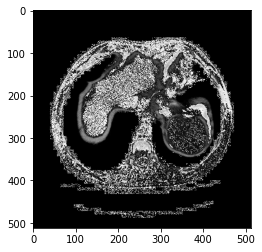

In [ ]:
img_2_1 = np.array(img_2) - np.array(img_1)
plt.imshow(img_2_1, cmap='gray')

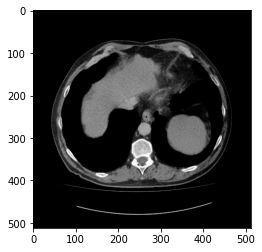

In [ ]:
img_max = np.minimum(np.array(img_2), np.array(img_1))
plt.imshow(img_max, cmap='gray')

In [ ]:
data_imgs = 'gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/C_128-128-detph-gray-voxel.pkl'

In [ ]:
N_CHUNCKS = 50

def get_chuncks(slices, n_chuncks=64):

  """Receives a list of images

  returns the list chuncks

  """

  n_chuncks = math.ceil(len(slices) / n_chuncks)

  for i in range(0, len(slices), n_chuncks):
    yield slices[i:i+n_chuncks]

In [ ]:
def get_maximum(list_matrix):

  if len(list_matrix) == 1:
    return list_matrix[-1]

  for idx in range(len(list_matrix)-1):

    if idx == 0:  
      maximum = np.maximum(list_matrix[idx], list_matrix[idx+1])

    else:
      maximum = np.maximum(maximum, list_matrix[idx+1])

  return maximum


In [ ]:
def get_minimum(list_matrix):

  if len(list_matrix) == 1:
    return list_matrix[-1]

  for idx in range(len(list_matrix)-1):

    if idx == 0:  
      minimum = np.minimum(list_matrix[idx], list_matrix[idx+1])

    else:
      minimum = np.minimum(minimum, list_matrix[idx+1])

  return minimum

In [ ]:
C_voxels = pd.read_pickle(data_imgs)
list(C_voxels)

['volumetric_img', 'pat_id', 'label']

In [ ]:
voxels = []

for voxel in C_voxels.volumetric_img:

  voxel_chunck = []

  for chunck in get_chuncks(voxel):

    voxel_chunck.append(get_minimum(chunck))

  voxels.append(voxel_chunck)

In [ ]:
new_voxels = []

for v in voxels:

  diff = 64 - len(v)

  if diff != 0:

    slices_to_add = v[-diff:]
    new_voxels.append(v + slices_to_add)

  else:
    new_voxels.append(v)
    

In [ ]:
new_data = pd.DataFrame({'paciente_id':C_voxels.pat_id, 'label':C_voxels.label})

In [ ]:
new_data['img_volume'] = new_voxels

In [ ]:
new_data.shape

(127, 3)

In [ ]:
new_data.to_pickle('gdrive/Shareddrives/MO286 - Visualização de Dados/data_images/train_val_test_datasets/max_64_slices/C_min_64_slices.pkl')